In [1]:
# import các thư viện cần thiết
from math import log
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from sklearn.model_selection import train_test_split
import statistics
import os
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['font.size'] = 23


## Khám phá dữ liệu

In [2]:
# đọc và xem kích thước dữ liệu
df = pd.read_csv('data.csv',index_col=0)
df.shape

(101, 19)

In [3]:
# xem 5 dòng đầu
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,Class_Type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,Mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,Fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal


In [4]:
df=df.drop('animal_name',axis=1)

In [5]:
# kiểm tra số lượng dữ liệu nan
df.isna().sum()

hair          0
feathers      0
eggs          0
milk          0
airborne      0
aquatic       0
predator      0
toothed       0
backbone      0
breathes      0
venomous      0
fins          0
legs          0
tail          0
domestic      0
catsize       0
class_type    0
Class_Type    0
dtype: int64

In [6]:
# xóa tất cả dữ liệu nan
df = df.dropna()
df.shape

(101, 18)

In [7]:
# xem thông tin bộ dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hair        101 non-null    int64 
 1   feathers    101 non-null    int64 
 2   eggs        101 non-null    int64 
 3   milk        101 non-null    int64 
 4   airborne    101 non-null    int64 
 5   aquatic     101 non-null    int64 
 6   predator    101 non-null    int64 
 7   toothed     101 non-null    int64 
 8   backbone    101 non-null    int64 
 9   breathes    101 non-null    int64 
 10  venomous    101 non-null    int64 
 11  fins        101 non-null    int64 
 12  legs        101 non-null    int64 
 13  tail        101 non-null    int64 
 14  domestic    101 non-null    int64 
 15  catsize     101 non-null    int64 
 16  class_type  101 non-null    int64 
 17  Class_Type  101 non-null    object
dtypes: int64(17), object(1)
memory usage: 15.0+ KB


In [8]:
# xem mô tả
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


## Trực quan hóa dữ liệu

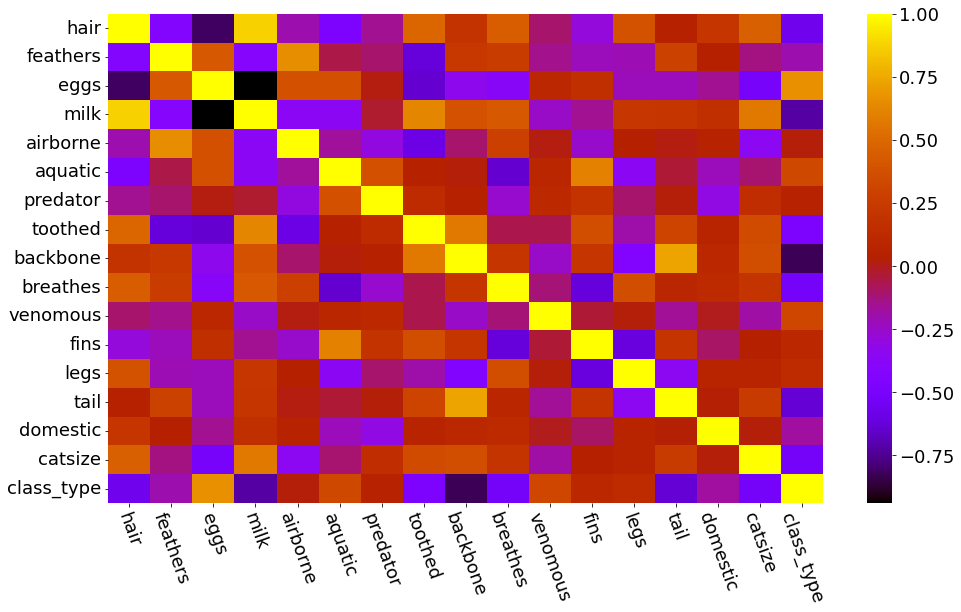

In [9]:
plt.rcParams['font.size'] = 18
ax = sns.heatmap(data=df.corr(),cmap='gnuplot')
ax.tick_params(axis='x', rotation=-70)
plt.show()

## Chọn thuộc tính đặc trưng

In [10]:
# chọn bằng hệ số tương quan
cor = df.corr()
feature = cor.index[abs(cor['class_type'])>0].tolist()
df_FE = df[feature]
df_FE.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## Xây dựng model decission tree

***Hàm số entropy:*** biểu thị độ hỗn loạn dữ liệu $$H(p)=-\sum_{i=1}^{n}p_i log(p_i)$$
p là xác suất 1 biến rời rạc $p_i = p(x=x_i)$, $i=1,..., n$\
Quy ước: 
- $log = ln$
- $log(0) = 0$

***Thuật toán ID3:***

- B1: Tính entropy của class
- B2: Tính entropy của từng thuộc tính
$$H(attr, class) = \sum_{i=v_1}^{v_n}\dfrac{N_i}{N_{Class}}H(attr)$$
- B3: Tính thông tin Gain cho từng thuộc tính
$$G(attr, Class) = H(Class)-H(attr, Class)$$
Khi đó điểm tối ưu (thuộc tính được chọn làm node) $$x* = argmax(G(attr, Class)) = argmin(H(attr, Class))$$
- B4: Kiểm tra trong các giá trị trong thuộc tính vừa chọn, nếu entropy bằng 0 thì đặt làm node lá
- B5: thực hiện lại công việc trên với bộ dữ liệu mới từ các giá trị còn lại 

In [11]:
class ID3():
    def __init__(self):
        self.tree = None
    
    # tính entropy theo class
    def ent(self, df) -> float:
        return sum([-i*log(i) for i in df[df.columns[-1]].value_counts(normalize=True).values if i!=0])
    
    # tính entropy theo thuộc tính (attribute) + class
    def  ent_atb(self, df, atb: str) -> float:
        return abs(sum([self.ent(df[[atb, df.columns[-1]]][df[atb]==i]) * len(df[atb][df[atb]==i])/len(df) for i in df[atb].unique()]))

    # tính thông tin gain
    # đầu ra là tên thuộc tính có giá trị gain lớn nhất
    def gain(self, df) -> str:
        return df.columns[:-1][np.argmax([self.ent(df) - self.ent_atb(df, i) for i in df.columns[:-1]])]


    # lọc lấy bảng con chứa 1 loại thông tin trong 1 trường dữ liệu
    def sub_df(self, df, node, value):
        return df[df[node] == value].reset_index(drop=True)

    # xây dựng cây
    def buildTree(self, df, tree = None):
        node = self.gain(df)
        attValue = np.unique(df[node])
   
        if tree is None:                    
            tree = {}
            tree[node] = {}

        for value in attValue:
            subtable = self.sub_df(df, node, value)
            labels, counts = np.unique(subtable[df.columns[-1]],return_counts=True) 
            if len(counts) == 1:
                tree[node][value] = labels[0]                                                    
            else:        
                tree[node][value] = self.buildTree(subtable)
        return tree
        
    # fit mô hình
    def fit(self, df):
        self.tree = self.buildTree(df.astype('object'))

    # dự đoán
    def predict(self, df):
        return np.array([int(self.pred(self.tree, i)) for _, i in df.iterrows()])

    def pred(self, tree, sample) -> str:
        if not isinstance(tree, dict):
            return tree
        else:
            root_node = next(iter(tree))
            feature_value = sample[root_node]
            if feature_value in tree[root_node]:
                return self.pred(tree[root_node][feature_value], sample)
            else:
                feature_value = list(tree[root_node].keys())[0]
                return self.pred(tree[root_node][feature_value], sample)

In [12]:
# tách dữ liệu tập huấn luyện và tập kiểm thử

df_train, df_test = train_test_split(df_FE, test_size=0.2, random_state=42)

In [13]:
# chạy mô hình
model = ID3()
model.fit(df_train)
pprint(model.tree)

{'legs': {0: {'aquatic': {0: {'toothed': {0: 7, 1: 3}},
                          1: {'eggs': {0: 1, 1: 4}}}},
          2: {'hair': {0: 2, 1: 1}},
          4: {'hair': {0: {'aquatic': {0: 3, 1: {'toothed': {0: 7, 1: 5}}}},
                       1: 1}},
          5: 7,
          6: {'aquatic': {0: 6, 1: 7}},
          8: 7}}


In [14]:
# dự đoán với tập dữ liệu kiểm thử
X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]

y_pred = model.predict(X_test)

In [15]:
# đánh giá mô hình với tỷ lệ dự đoán đúng
def accuracy_score(y_test, y_pred):
    return np.sum(np.equal(y_test, y_pred))/len(y_test)

accuracy_score(y_test, y_pred)

0.9047619047619048

> Mô hình dự đoán khá tốt

## Dùng thư viện sklean

In [16]:
df_ = df_FE

In [17]:
# df_ = pd.get_dummies(df_)

In [18]:
from sklearn.tree import DecisionTreeClassifier

X, y = df.iloc[:, :-1], df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf = clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

In [19]:
# đánh giá
print(accuracy_score(y_test, predictions))

1.0


In [20]:
from sklearn.tree import plot_tree

[Text(0.4090909090909091, 0.9, 'X[16] <= 2.5\nentropy = 2.445\nsamples = 80\nvalue = [4, 18, 5, 11, 9, 29, 4]'),
 Text(0.18181818181818182, 0.7, 'X[16] <= 1.5\nentropy = 0.96\nsamples = 47\nvalue = [0, 18, 0, 0, 0, 29, 0]'),
 Text(0.09090909090909091, 0.5, 'entropy = 0.0\nsamples = 29\nvalue = [0, 0, 0, 0, 0, 29, 0]'),
 Text(0.2727272727272727, 0.5, 'entropy = 0.0\nsamples = 18\nvalue = [0, 18, 0, 0, 0, 0, 0]'),
 Text(0.6363636363636364, 0.7, 'X[16] <= 4.5\nentropy = 2.19\nsamples = 33\nvalue = [4, 0, 5, 11, 9, 0, 4]'),
 Text(0.45454545454545453, 0.5, 'X[16] <= 3.5\nentropy = 0.837\nsamples = 15\nvalue = [0, 0, 0, 11, 0, 0, 4]'),
 Text(0.36363636363636365, 0.3, 'entropy = 0.0\nsamples = 4\nvalue = [0, 0, 0, 0, 0, 0, 4]'),
 Text(0.5454545454545454, 0.3, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 0, 11, 0, 0, 0]'),
 Text(0.8181818181818182, 0.5, 'X[16] <= 6.5\nentropy = 1.496\nsamples = 18\nvalue = [4, 0, 5, 0, 9, 0, 0]'),
 Text(0.7272727272727273, 0.3, 'X[12] <= 5.0\nentropy = 0.991\n

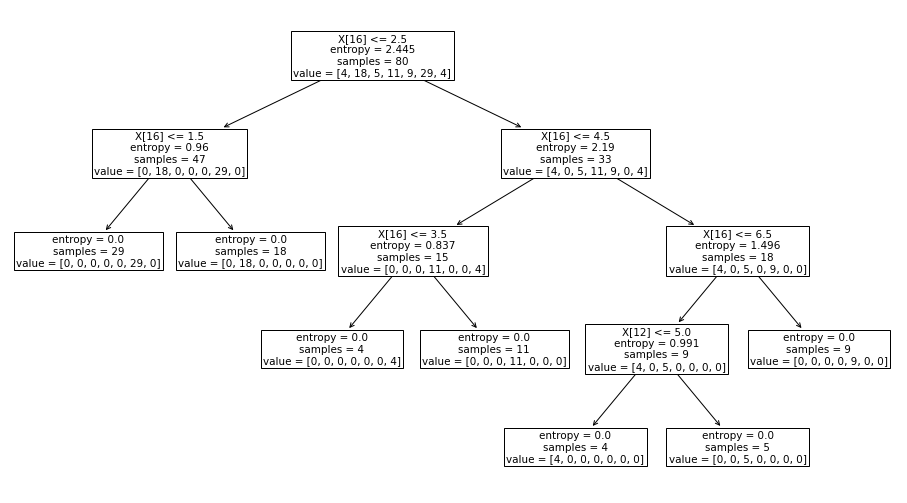

In [21]:
plot_tree(clf)